In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

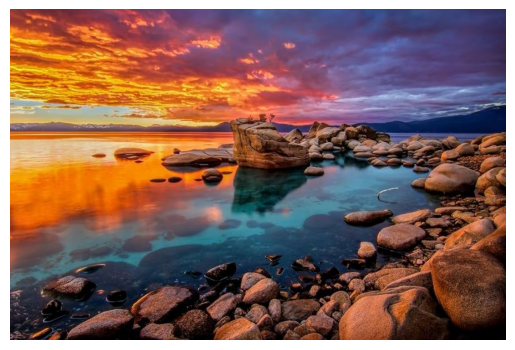

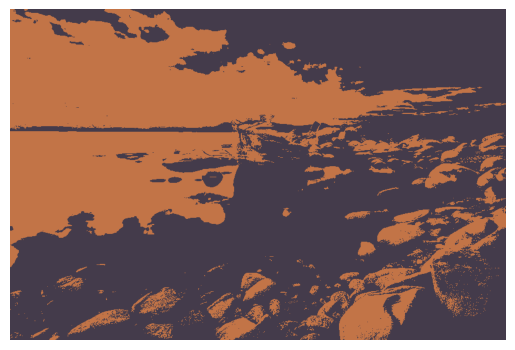

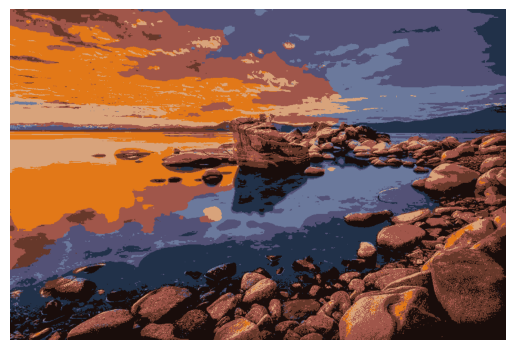

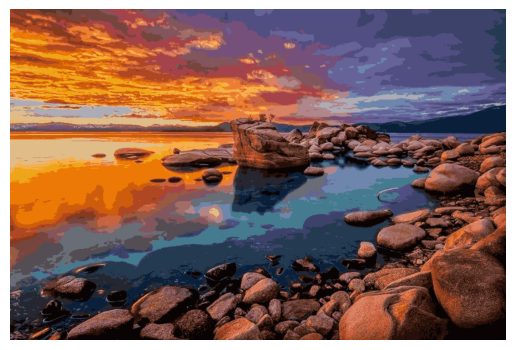

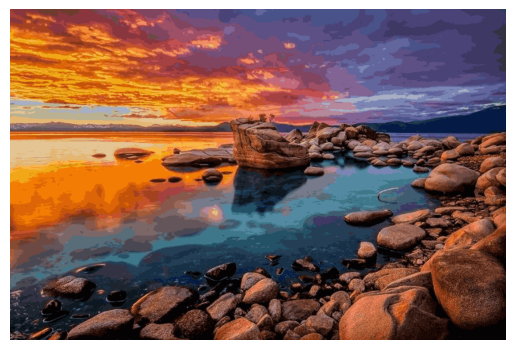

In [3]:
def load_image(image_path):
    try:
        image = plt.imread(image_path)
        image_array = np.array(image)
        return image_array
    except Exception as e:
        print("Error loading the image:", e)
        sys.exit(1)

def k_means(data, n_clusters, max_iter=300):
    centroids = data[np.random.choice(len(data), n_clusters, replace=False)]

    for _ in range(max_iter):
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(n_clusters)])
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

def display_image(image_array):
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()

def image_color_quantization(image_path, n_colors):
    image_array = load_image(image_path)
    h, w, d = image_array.shape
    data = image_array.reshape((h * w, d))

    centroids, labels = k_means(data, n_colors)
    quantized_data = centroids[labels]
    quantized_image = quantized_data.reshape((h, w, d)).astype(np.uint8)

    return quantized_image


image_path = "test.jpg"
num_colors_list = [2, 8, 32, 64]

original_image = load_image(image_path)
display_image(original_image)

for num_colors in num_colors_list:
    quantized_image = image_color_quantization(image_path, num_colors)
    display_image(quantized_image)

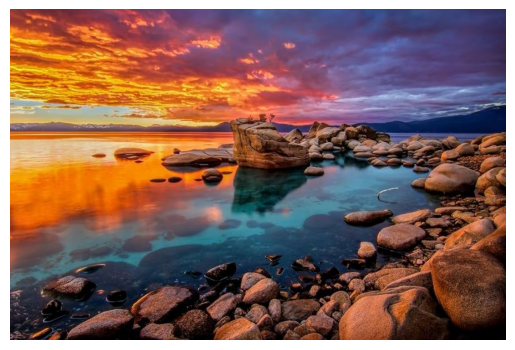

Quantized Image with K-Means (K=2):


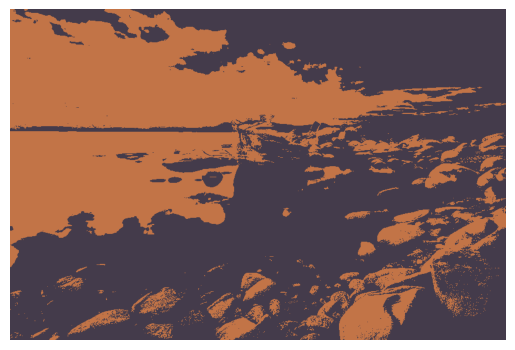

Quantized Image with Randomly Picked Centroids (K=2):


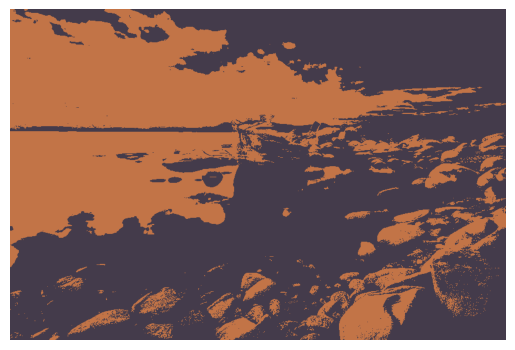

Quantized Image with K-Means (K=8):


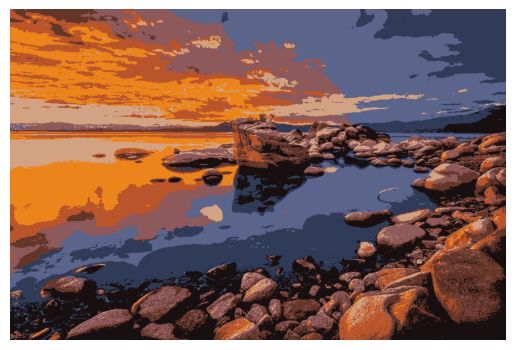

Quantized Image with Randomly Picked Centroids (K=8):


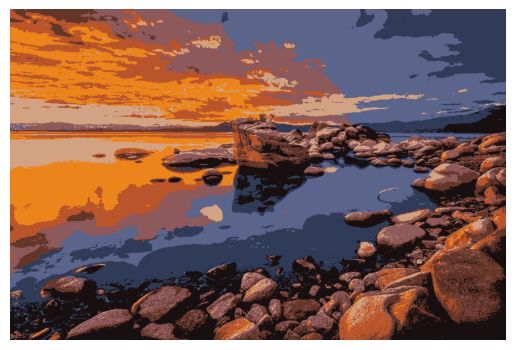

Quantized Image with K-Means (K=32):


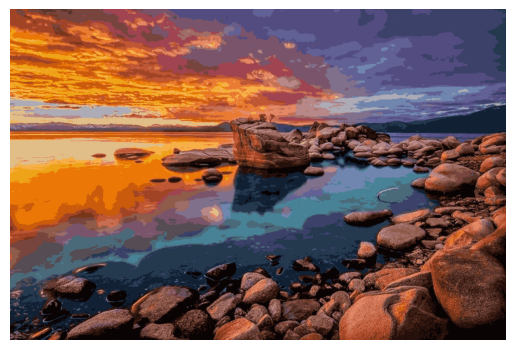

Quantized Image with Randomly Picked Centroids (K=32):


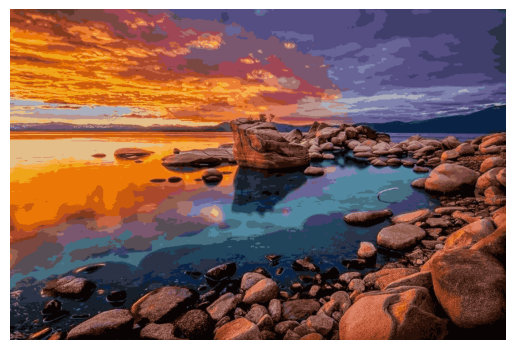

Quantized Image with K-Means (K=64):


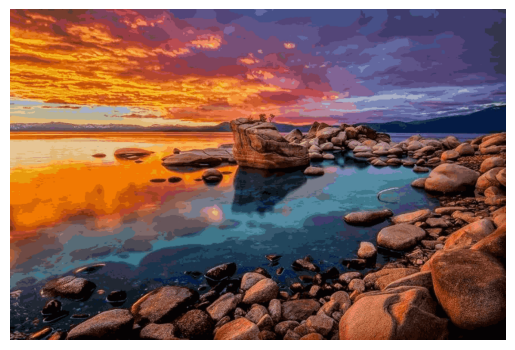

Quantized Image with Randomly Picked Centroids (K=64):


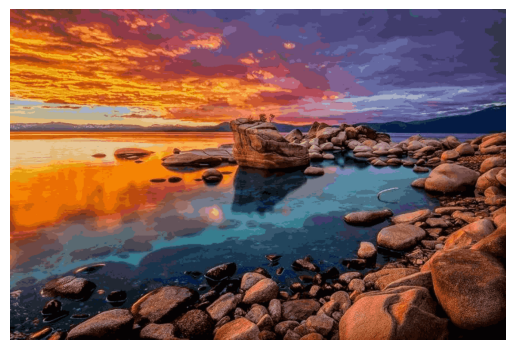

In [ ]:
def load_image(image_path):
    try:
        image = plt.imread(image_path)
        image_array = np.array(image)
        return image_array
    except Exception as e:
        print("Error loading the image:", e)
        sys.exit(1)

def random_init_centroids(data, n_clusters):
    centroids = data[np.random.choice(len(data), n_clusters, replace=False)]
    return centroids

def k_means(data, centroids, max_iter=300):
    for _ in range(max_iter):
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) if np.sum(labels == i) > 0 else centroids[i] for i in range(len(centroids))])

        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

def display_image(image_array):
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()

def image_color_quantization(image_path, n_colors, use_random_init=False):
    image_array = load_image(image_path)
    h, w, d = image_array.shape
    data = image_array.reshape((h * w, d))

    if use_random_init:
        centroids = random_init_centroids(data, n_colors)
    else:
        centroids, _ = k_means(data, data[np.random.choice(len(data), n_colors, replace=False)])

    centroids, labels = k_means(data, centroids)
    quantized_data = centroids[labels]
    quantized_image = quantized_data.reshape((h, w, d)).astype(np.uint8)

    return quantized_image

image_path = "test.jpg"
num_colors_list = [2, 8, 32, 64]

original_image = load_image(image_path)
display_image(original_image)

for num_colors in num_colors_list:
    kmeans_quantized_image = image_color_quantization(image_path, num_colors)
    random_quantized_image = image_color_quantization(image_path, num_colors, use_random_init=True)

    print(f"Quantized Image with K-Means (K={num_colors}):")
    display_image(kmeans_quantized_image)
    print(f"Quantized Image with Randomly Picked Centroids (K={num_colors}):")
    display_image(random_quantized_image)

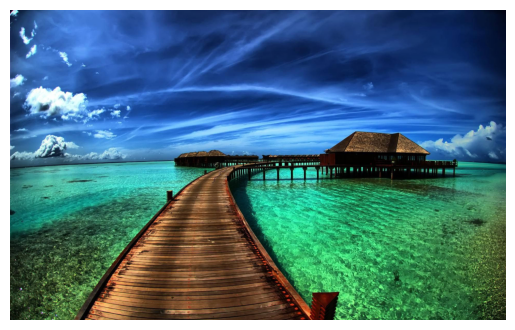

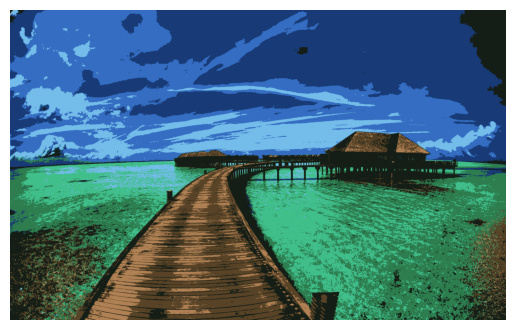

In [7]:
def load_image(image_path):
    try:
        image = plt.imread(image_path)
        return image
    except Exception as e:
        print("Error loading the image:", e)
        sys.exit(1)

def k_means(data, n_clusters, max_iter=300):
    centroids = data[np.random.choice(len(data), n_clusters, replace=False)]
    for _ in range(max_iter):
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(n_clusters)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

def display_image(image_array):
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()

image_path = "myimage.jpg"
original_image = load_image(image_path)
display_image(original_image)

h, w, d = original_image.shape
data = original_image.reshape((h * w, d))
num_clusters = 8
centroids, labels = k_means(data, num_clusters)

clustered_image = centroids[labels].reshape((h, w, d)).astype(np.uint8)
display_image(clustered_image)